# Titanic: Machine Learning

## Exploring Data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# TODO: Dont hard code the path
# Either define a variable to store the path or let input file be in the same folder
# 2nd approach is better -- Did this now.

train_df = pd.read_csv('train.csv')  # training data in a pandas' Data Frame object
test_df  = pd.read_csv('test.csv')   # test data

In [3]:
# first 10 records
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# last 10 records
train_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


train_df.info() #Notice missing values for Age and Embarked, also, we may want to drop the Cabin column since it only has 204 entries.

In [5]:
# <Raghu> for now since we are starting, lets go with mean.
# Here in this example, they have used a formula making use of mean and std dev of training data for Age.
# https://www.kaggle.io/svf/560373/fcf6c03312081da830b2ab2cb26b4a1a/__results__.html#6.-Age
# We can do these later to improve efficiency of learning and predicting. </Raghu>

print(train_df['Age'].value_counts(dropna=False)) #How should we handle these? Drop NaNs? Replace wtih mean?

NaN       177
 24.00     30
 22.00     27
 18.00     26
 28.00     25
 19.00     25
 30.00     25
 21.00     24
 25.00     23
 36.00     22
 29.00     20
 32.00     18
 26.00     18
 35.00     18
 27.00     18
 16.00     17
 31.00     17
 34.00     15
 23.00     15
 33.00     15
 20.00     15
 39.00     14
 17.00     13
 42.00     13
 40.00     13
 45.00     12
 38.00     11
 50.00     10
 2.00      10
 4.00      10
         ... 
 28.50      2
 63.00      2
 0.83       2
 30.50      2
 70.00      2
 57.00      2
 0.75       2
 13.00      2
 59.00      2
 10.00      2
 64.00      2
 40.50      2
 45.50      2
 32.50      2
 20.50      1
 24.50      1
 0.67       1
 70.50      1
 0.92       1
 74.00      1
 34.50      1
 14.50      1
 80.00      1
 12.00      1
 53.00      1
 36.50      1
 55.50      1
 66.00      1
 23.50      1
 0.42       1
Name: Age, Length: 89, dtype: int64


In [6]:
train_df.describe() #Only 38% of passengers survived, average age is 29.67.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


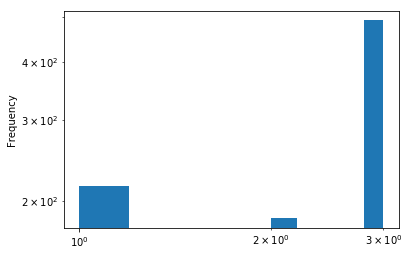

In [7]:
train_df['Pclass'].plot(kind = 'hist', rot=0, logx=True, logy=True) 
#Large majority 3rd class, small portion 1st, even smaleler portion 2nd

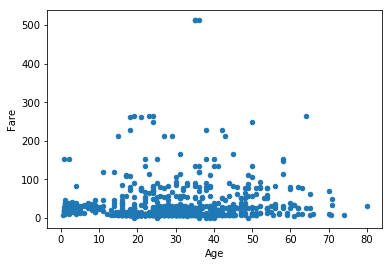

In [8]:
train_df.plot(kind='scatter', x='Age', y='Fare') #Outliers?

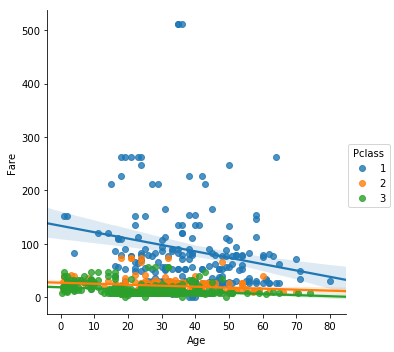

In [9]:
sns.lmplot(x='Age', y='Fare', data=train_df, hue='Pclass') 
#Probably not outliers/errors in data, likely just very expensive tickets since they are 1st class passengers?

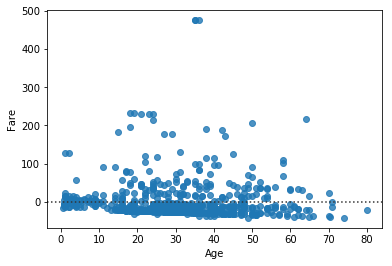

In [10]:
sns.residplot(x='Age', y='Fare', data=train_df, dropna=True)

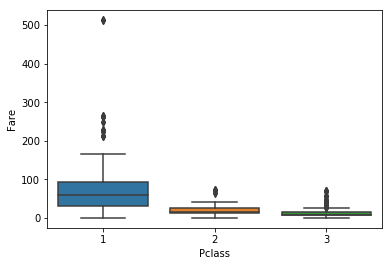

In [11]:
sns.boxplot(x='Pclass', y='Fare', data=train_df)

# Cleaning data

## Replacing NaN values of Age variable

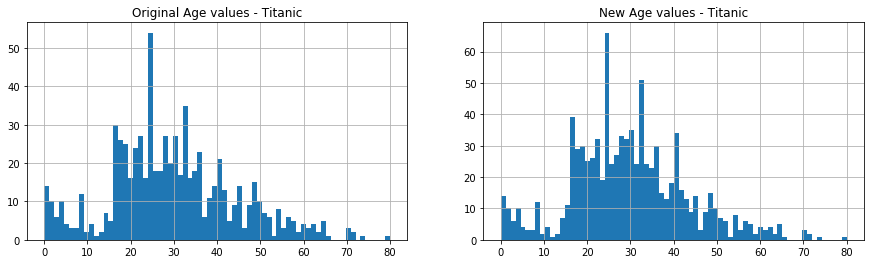

In [12]:
# </Rachel> I went to the link provided above for this calculation, but was confused by the Warning message
# I found a similar method on a Github forum that shows the distribution before and after the random values are generated </Rachel>

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# plot original Age values (drop null values and convert to int)
train_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# get average, std and number of NaN values
average_age = train_df["Age"].mean()
std_age = train_df["Age"].std()
count_nan_age = train_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_age = np.random.randint(average_age - std_age, average_age + std_age, size = count_nan_age)

# fill NaN values in Age column with random values generated
age_slice = train_df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age

# plot imputed Age values
age_slice.astype(int).hist(bins=70, ax=axis2)

In [13]:
# Distribution looks good - replace Age vector in original data with new values
train_df["Age"] = age_slice

# Show number of missing Age values
train_df["Age"].isnull().sum()

0

## Specify variables for prediction model

In [14]:
# With the target variable "Survived", I would recommend starting with Sex, Age, Pclass and Fare as our predictors...
# Let me know what you think!

# <Raghu>  Yes, lets start with these we have to engineer the data (fill NaNs) and clean the data 
# to make it less overfitting. </Raghu>
